# Tutorials on Deep Pipe

## #0 . Introduction to Deep Pipe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import deep pipe library
# how to install: https://github.com/neuro-ml/deep_pipe/blob/master/README.md
import dpipe

### Class `Brats2017`

In [3]:
# import `Brats2017` class
from dpipe.dataset.brats import Brats2017

In [4]:
# use arguments `data_path` and `metadate_rpath` to create an instance of a `Brats2017` class
# the examples of the input arguments can be found: \
# https://github.com/neuro-ml/deep_pipe/blob/master/config_examples/assets/data_source/
# 
# we are using IITP machine with stored Brats dataset:
# https://github.com/neuro-ml/deep_pipe/blob/master/config_examples/assets/data_source/iitp/brats.config
dataset = Brats2017(data_path = "/nmnt/t01-ssd/brats2017/train", metadata_rpath = "metadata.csv")

#### Let's look at the available methods and attributes:

In [5]:
# path to the data
dataset.data_path

'/nmnt/t01-ssd/brats2017/train'

In [6]:
# loaded metadata stored in .csv
# it has index column `id`, path to images with different modalities `t1`, `t1ce`, ... \
# and also it cointains the column with the path to the target segmented image: `segm`
df = dataset.df
df.head()

,cancer_type,age,survival_days,survival_class,t1,t1ce,t2,flair,segm
id,,,,,,,,,
Brats17_2013_0_1,LGG,NaN,NaN,NaN,LGG/Brats17_2013_0_1/Brats17_2013_0_1_t1.nii.gz,LGG/Brats17_2013_0_1/Brats17_2013_0_1_t1ce.nii.gz,LGG/Brats17_2013_0_1/Brats17_2013_0_1_t2.nii.gz,LGG/Brats17_2013_0_1/Brats17_2013_0_1_flair.ni...,LGG/Brats17_2013_0_1/Brats17_2013_0_1_seg.nii.gz
Brats17_2013_10_1,HGG,NaN,NaN,NaN,HGG/Brats17_2013_10_1/Brats17_2013_10_1_t1.nii.gz,HGG/Brats17_2013_10_1/Brats17_2013_10_1_t1ce.n...,HGG/Brats17_2013_10_1/Brats17_2013_10_1_t2.nii.gz,HGG/Brats17_2013_10_1/Brats17_2013_10_1_flair....,HGG/Brats17_2013_10_1/Brats17_2013_10_1_seg.ni...
Brats17_2013_11_1,HGG,29.12,150.0,0.0,HGG/Brats17_2013_11_1/Brats17_2013_11_1_t1.nii.gz,HGG/Brats17_2013_11_1/Brats17_2013_11_1_t1ce.n...,HGG/Brats17_2013_11_1/Brats17_2013_11_1_t2.nii.gz,HGG/Brats17_2013_11_1/Brats17_2013_11_1_flair....,HGG/Brats17_2013_11_1/Brats17_2013_11_1_seg.ni...
Brats17_2013_12_1,HGG,NaN,NaN,NaN,HGG/Brats17_2013_12_1/Brats17_2013_12_1_t1.nii.gz,HGG/Brats17_2013_12_1/Brats17_2013_12_1_t1ce.n...,HGG/Brats17_2013_12_1/Brats17_2013_12_1_t2.nii.gz,HGG/Brats17_2013_12_1/Brats17_2013_12_1_flair....,HGG/Brats17_2013_12_1/Brats17_2013_12_1_seg.ni...
Brats17_2013_13_1,HGG,NaN,NaN,NaN,HGG/Brats17_2013_13_1/Brats17_2013_13_1_t1.nii.gz,HGG/Brats17_2013_13_1/Brats17_2013_13_1_t1ce.n...,HGG/Brats17_2013_13_1/Brats17_2013_13_1_t2.nii.gz,HGG/Brats17_2013_13_1/Brats17_2013_13_1_flair....,HGG/Brats17_2013_13_1/Brats17_2013_13_1_seg.ni...


In [7]:
# get the index column of the metadata
dataset.ids[:4]

['Brats17_2013_0_1',
 'Brats17_2013_10_1',
 'Brats17_2013_11_1',
 'Brats17_2013_12_1']

In [8]:
# names of columns with modalities in the dataset
dataset.modality_cols

['t1', 't1ce', 't2', 'flair']

In [9]:
# the number of channel (modalities) in the given dataset, returns `len(['t1', 't1ce', 't2', 'flair'])`
dataset.n_chans_image

4

In [10]:
# we can load the image by the `load_image(patient_id)` method
patient_id = 'Brats17_2013_12_1'
img = dataset.load_image(patient_id)
print('Shape of the image: ', img.shape)

Shape of the image:  (4, 240, 240, 155)


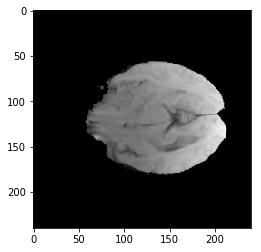

In [11]:
# and plot 60-th slice of first modality
plt.figure(figsize=(4,4))
plt.imshow(img[0][..., 60], cmap='gray')
plt.show()

In [12]:
# target column
dataset.target_col

'segm'

In [13]:
# we can load the segmented image by the `load_segm(patient_id)` method
segm_img = dataset.load_segm(patient_id)
print('Shape of the segmented image: ', segm_img.shape)

Shape of the segmented image:  (240, 240, 155)


In [14]:
# the number of diffent segmentation madalities (0 - black)
dataset.n_chans_segm

4

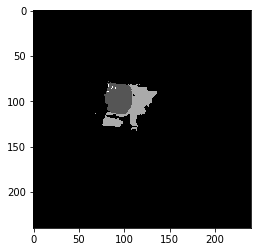

In [15]:
# plot 60-th slice of the segmented image
plt.figure(figsize=(4,4))
plt.imshow(segm_img[..., 60], cmap='gray')
plt.show()

In [16]:
# we can load the multimodal segmented image by the `load_msegm(patient_id)` method
# the method returns multimodal segmentation of shape [n_chans_msegm, x, y, z]
# it can be used to compute dice scores
msegm_img = dataset.load_msegm(patient_id)
print('Shape of the multimodal segmented image: ', msegm_img.shape)

Shape of the multimodal segmented image:  (3, 240, 240, 155)


In [17]:
# the number of segmented channels
dataset.n_chans_msegm

3

In [18]:
# we can look at the segm to msegm matrix
dataset.segm2msegm_matrix

array([[False, False, False],
       [ True,  True, False],
       [ True, False, False],
       [ True,  True,  True]], dtype=bool)

In [19]:
# we can transform segm image (with values 0, 1, 2, etc) into unrolled version (multimodal segm image)
# using the method `segm2msegm(img)`
print('Shape: ', dataset.segm2msegm(segm_img).shape)

Shape:  (3, 240, 240, 155)
